## Linear initial-boundary value problem for a two-dimensional heat equation:

$$
\frac{\partial u}{\partial t} = \sum \limits_{\alpha=1}^{2} \frac{\partial}{\partial x_\alpha} \left (k_\alpha \frac{\partial u}{\partial x_\alpha} \right ) -u, \quad x_\alpha \in [0,1] \quad (\alpha=1,2), \ t>0;
$$

$$
k_\alpha =
\begin{cases}
    50, (x_1, x_2) \in \Delta ABC\\
    1, (x_1, x_2) \notin \Delta ABC
\end{cases}
$$

$$
(\alpha = 1,2), \ A(0.2,0.5), \ B(0.7,0.2), \ C(0.5,0.8);
$$

$$
u(x_1, x_2, 0) = 0,\ u(0,x_2,t) = 1 - e^{-\omega t},\  u(1, x_2, t) = 0,
$$
$$
u(x_1,0,t) = 1 - e^{-\omega t},\ u(0, x_2, t) = 0,\  \omega = 20.
$$

Although it would be more correct to call it the diffusion equation.

## Numerical algorithm

Defining the grid:
$$
\Omega = \omega_{x_1} \times \omega_{x_2} \times \omega_t, \\
\omega_{x_\alpha} = \left \{ x_{\alpha, i_\alpha} = i_\alpha h, i_\alpha = 0,...,N, h = \frac{1}{N}, \right \}\ \alpha = 1,2, \\
\omega_t = \left \{t_j = j \tau, j=0,...,N_t, \tau = \frac{t_{max}}{N_t}\right \}.
$$
** Difference scheme:**
To make it easier to paint, we will introduce the following operators: 
$$\Delta_{1}f_{i,j} = \frac{f_{i+1/2,j} - f_{i-1/2,j}}{h},$$
$$\Delta_{2}f_{i,j} = \frac{f_{i,j+1/2} - f_{i,j-1/2}}{h}.$$

Explicit difference scheme:
$$
\frac{u_{i,j}^t - u_{i,j}^{t-1}}{\tau} = \Delta_{1}(k_{i,j}\Delta_{1}u_{i,j}^{t-1}) + \Delta_{2}(k_{i,j}\Delta_{2}u_{i,j}^{t-1}) - u_{i,j}^t.
$$
In the case of an explicit difference scheme, the values of the function at the previous time are used for the calculation and it is not necessary to solve the equation for the values of $u^t_{i,j}$. However, such a scheme is less accurate and requires a much smaller time step.

Implicit difference scheme:
$$
\frac{u_{i,j}^t - u_{i,j}^{t-1}}{\tau} = \Delta_{1}(k_{i,j}\Delta_{1}u_{i,j}^t) + \Delta_{2}(k_{i,j}\Delta_{2}u_{i,j}^t) - u_{i,j}^t,
$$

$$
\frac{u_{i,j}^t - u_{i,j}^{t-1}}{\tau} = \Delta_{1}(k_{i,j}\frac{u_{i+1/2,j}^t - u_{i-1/2,j}^t}{h}) + 
\Delta_{2}(k_{i,j}\frac{u_{i,j+1/2}^t - u_{i,j-1/2}^t}{h}) - u_{i,j}^t,
$$
$$
\frac{u_{i,j}^t - u_{i,j}^{t-1}}{\tau} = \frac{k_{i+1/2,j}\frac{u_{i+1,j}^t - u_{i,j}^t}{h} - k_{i-1/2,j}\frac{u_{i,j}^t
- u_{i-1/2,j}^t}{h}}{h} +
\frac{k_{i,j+1/2}\frac{u_{i,j+1}^t - u_{i,j}^t}{h} - k_{i,j-1/2}\frac{u_{i,j}^t
- u_{i,j-1/2}^t}{h}}{h} - u_{i,j}^t,
$$
$$
\frac{u_{i,j}^t - u_{i,j}^{t-1}}{\tau} = \frac{k_{i+1/2,j}u_{i+1,j}^t - u_{i,j}^t - k_{i-1/2,j}u_{i,j}^t
- u_{i-1/2,j}^t + k_{i,j+1/2}u_{i,j+1}^t - u_{i,j}^t - k_{i,j-1/2}u_{i,j}^t
- u_{i,j-1/2}^t}{h^2} - u_{i,j}^t.
$$
Move everything related to $u^t$ to the left side, and $u^{t1}$ to the right side and multiply by $\tau$:
$$
(1 + \frac{\tau}{h^2}(k_{i+1/2,j} + k_{i-1/2,j} + k_{i,j+1/2} + k_{i,j-1/2}) + \tau)u_{i,j}^t - \\ - \frac{\tau}{h^2}(k_{i+1/2,j}u_{i+1,j}^t + k_{i-1/2,j}u^t_{i-1,j} + k_{i,j+1/2}u^t_{i,j+1} + k_{i,j-1/2}u^t_{i,j-1}) = u^{t-1}_{i,j}.
$$
In fact, we have obtained an operator equation over the grid:
$$
Au^t = u^{t-1},
$$
what, if we write the values of $u^t$ in the grid nodes as an ordinary vector, is the usual system of linear equations ($Ax = b$). The values at the previous time point are constants, since they have already been calculated.
For convenience, we represent the operator $A$ as the difference of two operators:

$$A = D_A - (A^+ + A^{-}),$$ where:
$$
D_A u^t = (1 + \frac{\tau}{h^2}(k_{i+1/2,j} + k_{i-1/2,j} + k_{i,j+1/2} + k_{i,j-1/2}) + \tau) u^t_{i,j} - diagonal,
$$
$$
(A^+ + A^{-})u^t = \frac{\tau}{h^2}(k_{i+1/2,j}u^t_{i+1,j} + k_{i-1/2,j}u^t_{i-1,j} +
k_{i,j+1/2}u^t_{i,j+1} + k_{i,j-1/2}u^t_{i,j-1}).
$$
Replacing $u^t$ with our estimate $\hat{u}^t$, we write the error functional:
$$
r = A\hat{u}^t - u^{t-1} = (D_A - A^+ - A^{-})\hat{u}^t - u^{t-1},
$$
$$
L = \sum r_{i,j}^2.
$$
where $r_{i,j}$ is the error in the grid nodes.
We will iteratively minimize the error functional using the gradient.

As a result, the task was reduced to multiplying tensors and gradient descent, and this is exactly what * * tensorflow** was designed for.

## Implementation on tensorflow

#### Briefly about * * tensorflow**
In tensorflow, the calculation graph is built first. Resources for the graph are allocated inside * * tf. Session**. Graph nodes are operations on data. The cells for the input data to the graph are * * tf. placeholder**. To execute the graph, you need to run the **run** method on the session object, passing the operation of interest and the input data for placeholders to it. The **run** method returns the result of the operation, and can also change the values inside * * tf. Variable** within the session. tensorflow itself is able to build graphs of operations that implement* backpropagation * of the gradient, provided that the original graph contains only operations for which the gradient is implemented (not all of them yet).

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf    
from IPython.display import clear_output
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.animation import FuncAnimation
from matplotlib import cm
import seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import warnings
warnings.filterwarnings('ignore')
from collections import OrderedDict
import itertools
from IPython.core.pylabtools import figsize
pd.set_option('display.max_columns', 30)
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import timeit
import os

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# Class encapsulating the logic of initialization of the execution and training of the graph of the heat equation
class HeatEquation():
    def __init__(self, nxy, tmax, nt, q, k, f, u0, u0yt, u1yt, ux0t, ux1t):
        self._nxy = nxy # points in x, y direction
        self._tmax = tmax#maximum time

        self._nt = nt # number of points in time

        self._k  = k # function k

        self._f  = f # function f

        self._u0 = u0 # initial condition

        self._q  = q
        # boundary conditions

        self._u0yt = u0yt 
        self._u1yt = u1yt
        self._ux0t = ux0t
        self._ux1t = ux1t
       # steps by coordinates and by time

        self._h = h = np.array(1./nxy)
        self._ht = ht = np.array(tmax/nt)
        print("ht/h/h:", ht/h/h)

        self._xs = xs = np.linspace(0., 1.,    nxy + 1)
        self._ys = ys = np.linspace(0., 1.,    nxy + 1)
        self._ts = ts = np.linspace(0., tmax,  nt  + 1) 

        from itertools import product
       # mesh nodes as vectors in space

        self._vs  = vs  = np.array(list(product(xs, ys)), dtype=np.float64)
        self._vcs = vsc = np.array(list(product(xs[1:-1], ys[1:-1])), dtype=np.float64) # внутренние узлы
        
        
# vectors in which k values ​​are calculated
        vkxs = np.array(list(product((xs+h/2)[:-1], ys)), dtype=np.float64) # k_i+0.5,j
        vkys = np.array(list(product(xs, (ys+h/2)[:-1])), dtype=np.float64) # k_i    ,j+0.5

        # grids with k values

        self._kxs = kxs = k(vkxs).reshape((nxy,nxy+1))
        self._kys = kys = k(vkys).reshape((nxy+1,nxy))

       # diagonal operator D_A
 
        D_A = np.zeros((nxy+1, nxy+1))
        D_A[0:nxy+1,0:nxy+0] += kys
        D_A[0:nxy+1,1:nxy+1] += kys
        D_A[0:nxy+0,0:nxy+1] += kxs
        D_A[1:nxy+1,0:nxy+1] += kxs
        self._D_A = D_A = 1 + ht/h/h*D_A[1:nxy,1:nxy] + ht*q

        # функция, которую будем искать
        self._U_shape    = (nxy+1, nxy+1, nt+1)
        self._U = np.zeros((nxy+1, nxy+1, nt+1)) 
        self._U[:,:,0] = u0(vs).reshape(self._U_shape[:-1]) # its value at time zero

    
    # метод, строящий граф
    def build_graph(self, learning_rate):
        def reset_graph():
            if 'sess' in globals() and sess:
                sess.close()
            tf.reset_default_graph()
        
        reset_graph()

        nxy = self._nxy

# input parameters
        kxs_    = tf.placeholder_with_default(self._kxs, (nxy,nxy+1))
        kys_    = tf.placeholder_with_default(self._kys, (nxy+1,nxy))
        D_A_    = tf.placeholder_with_default(self._D_A, self._D_A.shape)
        U_prev_ = tf.placeholder(tf.float64, (nxy+1, nxy+1), name="U_t-1")
        f_      = tf.placeholder(tf.float64, (nxy-1, nxy-1), name="f")

# the value of the function at a given moment in time, we will look for it
        U_ = tf.Variable(U_prev_, trainable=True, name="U_t", dtype=tf.float64)

# tensor slice
        def s(tensor, frm):
            return tf.slice(tensor, frm, (nxy-1, nxy-1), name="slicing")

# calculating the action of the operator A + _A- on u
        Ap_Am_U_  = s(U_, (0, 1))*s(self._kxs, (0, 1))
        Ap_Am_U_ += s(U_, (2, 1))*s(self._kxs, (1, 1))
        Ap_Am_U_ += s(U_, (1, 0))*s(self._kys, (1, 0))
        Ap_Am_U_ += s(U_, (1, 2))*s(self._kys, (1, 1))
        Ap_Am_U_ *= self._ht/self._h/self._h

#remains
        res = D_A_*s(U_,(1, 1)) - Ap_Am_U_ - s(U_prev_, (1, 1)) - self._ht*f_

# loss function to be optimized
        loss = tf.reduce_sum(tf.square(res), name="loss_res")

# boundary conditions and their influence on the loss function
        u0yt_ = None
        u1yt_ = None
        ux0t_ = None
        ux1t_ = None
        if self._u0yt:        
            u0yt_ = tf.placeholder(tf.float64, (nxy+1,), name="u0yt")
            loss += tf.reduce_sum(tf.square(tf.slice(U_, (0, 0),   (1, nxy+1))
                    - tf.reshape(u0yt_, (1, nxy+1))), name="loss_u0yt")
        if self._u1yt:
            u1yt_ = tf.placeholder(tf.float64, (nxy+1,), name="u1yt")
            loss += tf.reduce_sum(tf.square(tf.slice(U_, (nxy, 0), (1, nxy+1))
                    - tf.reshape(u1yt_, (1, nxy+1))), name="loss_u1yt")
        if self._ux0t:
            ux0t_ = tf.placeholder(tf.float64, (nxy+1,), name="ux0t")
            loss += tf.reduce_sum(tf.square(tf.slice(U_, (0, 0),   (nxy+1, 1))
                    - tf.reshape(ux0t_, (nxy+1, 1))), name="loss_ux0t")
        if self._ux1t:
            ux1t_ = tf.placeholder(tf.float64, (nxy+1,), name="ux1t")
            loss += tf.reduce_sum(tf.square(tf.slice(U_, (0, nxy), (nxy+1, 1))
                    - tf.reshape(ux1t_, (nxy+1, 1))), name="loss_ux1t")
       # surprisingly, the operation of assigning a value to individual elements in a tensor
        # no gradient implemented at the time of writing

# average error in points
        loss /= (nxy+1)*(nxy+1)

# functional optimization step
        train_step = tf.train.AdamOptimizer(learning_rate, 0.7, 0.97).minimize(loss)

# return operations in the dictionary that we will run
        self.g = dict(
            U_prev = U_prev_,
            f = f_,
            u0yt = u0yt_,
            u1yt = u1yt_,
            ux0t = ux0t_,
            ux1t = ux1t_,
            U = U_,
            res = res,
            loss = loss,
            train_step = train_step
        )
        return self.g

# method that returns the necessary data to run the graph
    def _get_graph_feed(self, t_i):
        g   = self.g
        ts  = self._ts
        xs  = self._xs
        ys  = self._ys
        vcs = self._vcs
        nxy = self._nxy
        t   = self._ts[t_i]

        d = {g["U_prev"]: self._U[:,:,t_i-1],
             g["f"]:      self._f(vcs, t).reshape((nxy-1, nxy-1))}

        if g["u0yt"] is not None:
            d[g["u0yt"]] = self._u0yt(ts[t_i-1], ys)
        if g["u1yt"] is not None:
            d[g["u1yt"]] = self._u1yt(ts[t_i-1], ys)
        if g["ux0t"] is not None:
            d[g["ux0t"]] = self._ux0t(ts[t_i-1], xs)
        if g["ux1t"] is not None:
            d[g["ux1t"]] = self._ux1t(ts[t_i-1], xs)
        return d
# main teaching method
    # at each moment of time we iterate over the values ​​of the function,
    # until we exceed maxiter or the error is less than eps
    def train_graph(self, eps, maxiter, miniter):
        g = self.g
        losses = []
        # запускам контекст сессии
        with tf.Session() as sess:
# initialize space for data in the graph
            sess.run(tf.global_variables_initializer(), feed_dict=self._get_graph_feed(0))
            for t_i, t in enumerate(self._ts[1:]):
                t_i += 1
                losses_t = []
                losses.append(losses_t)
                d = self._get_graph_feed(t_i)
                p_loss = float("inf")
                for i in range(maxiter):
# run the graph and get the values ​​of u, loss functions,
                    _, self._U[:,:,t_i], loss = sess.run([g["train_step"], g["U"], g["loss"]], feed_dict=d)
                    losses_t.append(loss)
                    if i > miniter and abs(p_loss - loss) < eps:
                        p_loss = loss
                        break
                    p_loss = loss
                print('#', end="")
        return self._U, losses

    def check_metadata_partitions_graph(self):
        g = self.g
        d = self._get_graph_feed(1)
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer(), feed_dict=d)
            options = tf.RunOptions(output_partition_graphs=True)
            metadata = tf.RunMetadata()
            c_val = sess.run(g["train_step"], feed_dict=d, options=options, run_metadata=metadata)
        print(metadata.partition_graphs)

    def get_U_as_df(self, step=1):
        nxyp  = self._nxy + 1
        nxyp2 = nxyp**2
        Uf = self._U.reshape((nxy+1)**2,-1)[:, ::step]
        data = np.hstack((self._vs, Uf))
        df = pd.DataFrame(data, columns=["x","y"] + list(range(len(self._ts))[0::step]))
        return df

$\tau$ and $h$ should be taken such that $\frac{\tau}{h^2}$ was small, preferably at least < 1, especially when using "non-smooth" functions.

## Запуск

In [3]:
tmax = 0.5
nxy  = 100
nt   = 10000

A = np.array([0.2, 0.15])
B = np.array([0.8, 0.15])
C = np.array([0.5, 0.3])

A1 = np.array([0.8, 0.8])
B1 = np.array([0.6, 0.5])
C1 = np.array([0.5, 0.6])

A2 = np.array([0.2, 0.5])
B2 = np.array([0.7, 0.2])
C2 = np.array([0.5, 0.8])

k1 = 1.0
k2 = 50.0
t1 = 0.0
t2 = 1.0
h0 = 0.0
h1 = 1.0
q  = 50.0

kn = np.array([[1., 2.]]) * 2
c = 30
omega = 20

def triang(v, k1, k2, A, B, C):
    v_ = v.copy()
    k = k1*np.ones([v.shape[0]])
    v_ = v - A
    B_ = B - A
    C_ = C - A
    m = (v_[:, 0]*B_[1] - v_[:, 1]*B_[0]) / (C_[0]*B_[1] - C_[1]*B_[0])
    l = (v_[:, 0] - m*C_[0]) / B_[0]
    inside = (m > 0.) * (l > 0.) * (m + l < 1.0)
    k[inside] = k2
    return k

def f(v, t):
    return 0.*triang(v, h0, h1, A2, B2, C2)

def u0(v):
    return 0.*triang(v, t1, t2, A2, B2, C2)

foo = np.zeros((nxy+1, 2))

def u0ytb(t, ys):
    return 1 - np.exp(-omega*np.ones(ys.shape[0])*t)

def ux0tb(t, xs):
    return 1 - np.exp(-omega*np.ones(xs.shape[0])*t)

def u1ytb(t, ys):
    return 0. * np.exp(-omega*np.ones(ys.shape[0])*t)

def ux1tb(t, xs):
    return 0. * np.exp(-omega*np.ones(xs.shape[0])*t)


def u0ytz(t, ys):
    return np.zeros(ys.shape[0])

def ux0tz(t, xs):
    return np.zeros(xs.shape[0])

def u1ytz(t, ys):
    return np.zeros(ys.shape[0])

def ux1tz(t, xs):
    return np.zeros(xs.shape[0])


def u0yt(t, ys):
    foo[:, 0] = -1.
    foo[:, 1] = ys
    return wave(foo, t, kn, c) * (1. - np.exp(-omega*t))

def u1yt(t, ys):
    foo[:, 0] = 1.
    foo[:, 1] = ys
    return wave(foo, t, kn, c) * (1. - np.exp(-omega*t))

def ux0t(t, xs):
    foo[:, 1] = -1.
    foo[:, 0] = xs
    return wave(foo, t, kn, c) * (1. - np.exp(-omega*t))

def ux1t(t, xs):
    foo[:, 1] = 1.
    foo[:, 0] = xs
    return wave(foo, t, kn, c) * (1. - np.exp(-omega*t))

In [4]:
# здесь запуск на более старом ноутбуке без GPU, поэтому время отличается от заявленного
eq = HeatEquation(nxy, tmax, nt, q, lambda x: triang(x, k1, k2, A2, B2, C2), f, u0, u0ytb, u1ytb, ux0tb, ux1tb)
_ = eq.build_graph(0.001)

ht/h/h: 0.5


In [5]:
# eq.check_metadata_partitions_graph()

In [6]:
%%time
U, losses = eq.train_graph(1e-6, 100, 1)

########################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In a good way, it was necessary to consider the values of the function at the edges as set and optimize the values of the function only in the inner region, but there were problems with this. There was no way to make only a part of the tensor optimized, and the operation of assigning a value to the tensor slice does not have a gradient written (at the time of writing the post). You could try to tinker cunningly on the edges or write your own optimizer. But just adding the difference at the edges of the function values and the boundary conditions to the error functional works well.

It is worth noting that the method with adaptive moment proved to be the best, even if the error functional is quadratic.


## Visualization

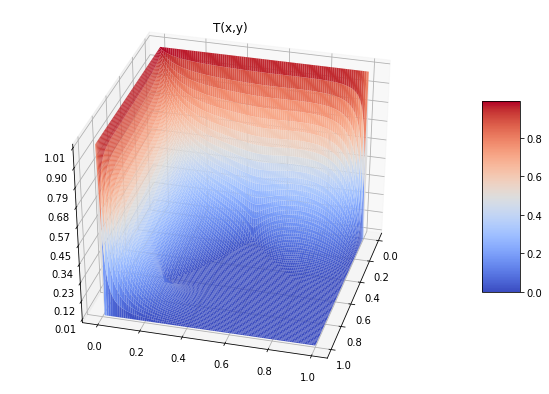

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata

data = eq.get_U_as_df(1)
# re-create the 2D-arrays
x1 = np.linspace(data['x'].min(), data['x'].max(), len(data['x'].unique()))
y1 = np.linspace(data['y'].min(), data['y'].max(), len(data['y'].unique()))
x2, y2 = np.meshgrid(x1, y1)
tts = range(0, len(eq._ts), 5)
z2 = griddata((data['x'], data['y']), data[5000], (x2, y2), method='cubic')

fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')
ax.view_init(35, 15)
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0., antialiased=True)
ax.set_zlim(0.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('T(x,y)')

plt.show()

## Drawing GIFs
3D gif drawing function:

In [8]:
def make_gif(Udf, fname):
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib.ticker import LinearLocator, FormatStrFormatter
    from scipy.interpolate import griddata
    
    fig = plt.figure(figsize=(10,7))

    ts = list(Udf.columns[2:])
    data = Udf

    x1 = np.linspace(data['x'].min(), data['x'].max(), len(data['x'].unique()))
    y1 = np.linspace(data['y'].min(), data['y'].max(), len(data['y'].unique()))
    x2, y2 = np.meshgrid(x1, y1)
    z2s = list(map(lambda x: griddata((data['x'], data['y']), data[x], (x2, y2), method='cubic'), ts))

    zmax = np.max(np.max(data.iloc[:, 2:])) + 0.01
    zmin = np.min(np.min(data.iloc[:, 2:])) - 0.01
    plt.grid(True)
    ax = fig.gca(projection='3d')
    ax.view_init(35, 15)

    ax.set_zlim(zmin, zmax)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    norm = matplotlib.colors.Normalize(vmin=zmin, vmax=zmax, clip=False)

    surf = ax.plot_surface(x2, y2, z2s[0], rstride=1, cstride=1, norm=norm, cmap=cm.coolwarm, linewidth=0., antialiased=True)
    fig.colorbar(surf, shrink=0.5, aspect=5)

    def update(t_i):
        label = 'timestep {0}\r'.format(t_i)
        ax.clear()
        print(label)
        surf = ax.plot_surface(x2, y2, z2s[t_i], rstride=1, cstride=1, norm=norm, cmap=cm.coolwarm, linewidth=0., antialiased=True)
        ax.view_init(35, 15+0.5*t_i)
        ax.set_zlim(zmin, zmax)
        return surf,

    anim = FuncAnimation(fig, update, frames=range(len(z2s)), interval=50)
    anim.save(fname, dpi=80, writer='imagemagick')


2D GIF drawing function:


In [9]:
def make_2d_gif(U, fname, step=1):
    fig = plt.figure(figsize=(10,7))

    zmax = np.max(np.max(U)) + 0.01
    zmin = 0 #np.min(np.min(U)) - 0.01
    norm = matplotlib.colors.Normalize(vmin=zmin, vmax=zmax, clip=False)
    im=plt.imshow(U[:,:,0], interpolation='bilinear', cmap=cm.coolwarm, norm=norm)
    plt.grid(False)
    nst = U.shape[2] // step

    def update(i):
        im.set_array(U[:,:,i*step])
        return im
    
    anim = FuncAnimation(fig, update, frames=range(nst), interval=50)
    anim.save(fname, dpi=80, writer='imagemagick')

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


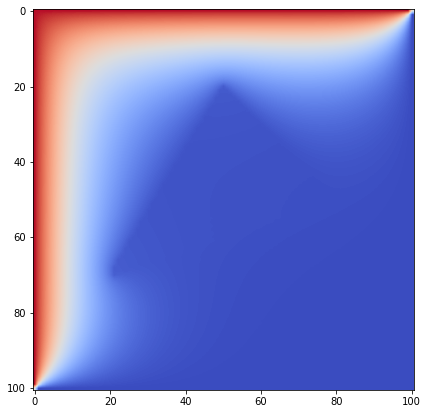

In [10]:
make_2d_gif(U[:,:,:], "test6_2d.gif", 100)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


timestep 0
timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 10
timestep 11
timestep 12
timestep 13
timestep 14
timestep 15
timestep 16
timestep 17
timestep 18
timestep 19
timestep 20
timestep 21
timestep 22
timestep 23
timestep 24
timestep 25
timestep 26
timestep 27
timestep 28
timestep 29
timestep 30
timestep 31
timestep 32
timestep 33
timestep 34
timestep 35
timestep 36
timestep 37
timestep 38
timestep 39
timestep 40
timestep 41
timestep 42
timestep 43
timestep 44
timestep 45
timestep 46
timestep 47
timestep 48
timestep 49
timestep 50
timestep 51
timestep 52
timestep 53
timestep 54
timestep 55
timestep 56
timestep 57
timestep 58
timestep 59
timestep 60
timestep 61
timestep 62
timestep 63
timestep 64
timestep 65
timestep 66
timestep 67
timestep 68
timestep 69
timestep 70
timestep 71
timestep 72
timestep 73
timestep 74
timestep 75
timestep 76
timestep 77
timestep 78
timestep 79
timestep 80
timestep 81
timestep 82
tim

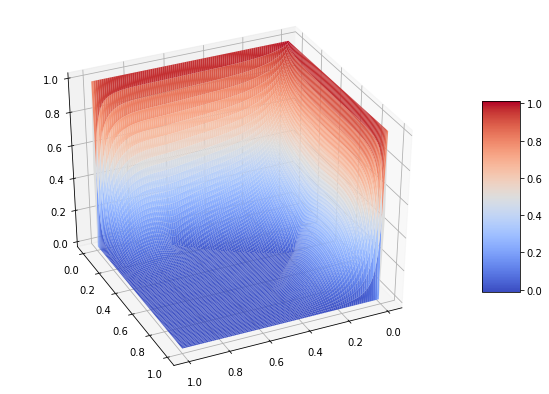

In [11]:
make_gif(eq.get_U_as_df(100), "test6.gif")

## Results
### Original task:

![](test0.gif)
![](test0_2d.gif)

### The condition is the same as the original one, but without $ - u$ in the equation:

$$
\frac{\partial u}{\partial t} = \sum \limits_{\alpha=1}^{2} \frac{\partial}{\partial x_\alpha} \left (k_\alpha \frac{\partial u}{\partial x_\alpha} \right ), \quad x_\alpha \in [0,1] \quad (\alpha=1,2), \ t>0;
$$

$$
k_\alpha =
\begin{cases}
    50, (x_1, x_2) \in \Delta ABC\\
    1, (x_1, x_2) \notin \Delta ABC
\end{cases}
$$

$$
u(x_1, x_2, 0) = 0,\ u(0,x_2,t) = 1 - e^{-\omega t},\  u(1, x_2, t) = 0,
$$

$$
u(x_1,0,t) = 1 - e^{-\omega t},\ u(0, x_2, t) = 0,\  \omega = 20.
$$

![](test1.gif)
![](test1_2d.gif)

Разницы почти нет, потому что производные имеют большие порядки, чем сама функция.

### Далее везде:

$$
\frac{\partial u}{\partial t} = \sum \limits_{\alpha=1}^{2} \frac{\partial}{\partial x_\alpha} \left (k_\alpha \frac{\partial u}{\partial x_\alpha} \right ) +f, \quad x_\alpha \in [0,1] \quad (\alpha=1,2), \ t>0;
$$

### Condition with one heating edge:

$$
k_\alpha =
\begin{cases}
    10, (x_1, x_2) \in \Delta ABC\\
    1, (x_1, x_2) \notin \Delta ABC
\end{cases}
$$

$$
f(x_1,x_2,t) = 0,
$$

$$
u(x_1, x_2, 0) = 0,\ u(0,x_2,t) = 1 - e^{-\omega t},\  u(1, x_2, t) = 0,
$$

$$
u(x_1,0,t) = 0,\ u(0, x_2, t) = 0,\  \omega = 20.
$$

![](test5.gif)
![](test5_2d.gif)

### Condition with cooling of the initially heated area:
$$
k_\alpha = 1,
$$

$$
f(x_1,x_2,t) = 0,
$$

$$
u(x_1, x_2, 0) =
\begin{cases}
    0.1, (x_1, x_2) \in \Delta ABC\\
    0, (x_1, x_2) \notin \Delta ABC
\end{cases}
$$

$$
u(0,x_2,t) = 0,\  u(1, x_2, t) = 0,
$$

$$
u(x_1,0,t) = 0,\ u(0, x_2, t) = 0.
$$

![](test3.gif)
![](test3_2d.gif)

### Condition with heating turned on in the area:
$$
k_\alpha =
\begin{cases}
    2, (x_1, x_2) \in \Delta ABC\\
    10, (x_1, x_2) \notin \Delta ABC
\end{cases}
$$

$$
f(x_1,x_2,t) =
\begin{cases}
    10, (x_1, x_2) \in \Delta ABC\\
    0, (x_1, x_2) \notin \Delta ABC
\end{cases}
$$

$$
u(x_1, x_2, 0) = 0,\ u(0,x_2,t) = 0,\  u(1, x_2, t) = 0,
$$

$$
u(x_1,0,t) = 0,\ u(0, x_2, t) = 0.
$$

![](test2.gif)
![](test2_2d.gif)

## Total

It is worth noting that the original condition without using * * GPU** was considered 4m 26s, and with using * * GPU** 2m 11s. For larger point values, the gap grows. However, not all operations in the resulting **GPU * * graph are compatible.
Characteristics of the machine:

* Intel Core i7 6700HQ 2600MHz,
* NVIDIA GeForce GTX 960M.

It was an interesting experience.
Tensorflow has performed well for this task.
Maybe even this approach will get some application - it is more pleasant to write code in python than in C/C++, and with the development of tensorflow it will become even easier.

Thanks for your attention!